# H-SAF Snow Cluster Lab Content

Within the content of this lab session information about snow products those are being
produced by the snow cluster of H-SAF is presented. It is aimed to make the users familiar with the
products and how to make use of the products in their studies easily. This lab session will provide
users a quick reference guide and easy to follow instructions on the snow products. This reference will guide you though 3 steps including:

- ### Module 1
Connect to FTP and retrive data

- ### Module 2
Read downloaded data and visualize
- ### Module 3
Data Projection and Spatial Analysis

<h3 style="color:blue">Snow Products</h3>

The snow products those are being produced by HSAF Snow cluster are as follows, each product
is categorized by the following titles
- H10 – SN-OBS-1
- H11 – SN-OBS-2
- H12 – SN-OBS-3
- H13 – SN-OBS-4

Monitoring and modelling of snow charac¬teristics are important since snow cover is an essential climate variable directly affecting the Earth’s energy balance. Snow cover has a number of important physical properties that exert an influence on global and regional energy, water and carbon cycles. 

- Operational snow products namely H10 (Snow detection (snow mask) by VIS/IR radiometry), 
- H13 (Snow Water Equivalent by MW radiometry), 
- H32(Effective snow cover by VIS/IR radiometry AVHRR Operational in LSA SAF: handover to H SAF in progress), 
- H34(superseding H10 and H31), 
- H35(superseding H12 and H32) have been developed since 2008 within HSAF. 


H11 and H13 are the products obtained from microwave sensors namely SSMI/S and they have 0.25° spatial resolution. H13 retrieval is based on snow depth algorithm based on 19H and 37H microwave channels. H13 algorithm uses the Helsinki University of Technology (HUT) snow emission model having slightly changes in the assimilation for flat/forest and mountainous areas. 


<br></br>
<figure >
    <img src="./image/Jp1.png" style="height:500px" align="center"
         alt="H34">
</figure>
<center>H34  product for January 19, 2019</center>


Validation studies indicate the optical snow products have large snow mapping accuracy with respect to ground snow observations, which varies between 69 and 94% in the winter seasons. Recent studies of H13 product give RMSE as 40 mm for flat areas and 45 mm for mountainous areas for annual snow season. 

<br></br>
<figure >
    <img src="./image/jp2.png" alt="H32" align="center">
</figure>
<center>H32  product for March 22, 2019</center>

Snow products are generated by FMI (flat) and TSMS (mountainous); algorithm development of mountainous areas is carried on by METU.

<br></br>
<figure >
    <img src="./image/jp3.png" style="height:500px" align="center"
         alt="H13">
</figure>
<center>H13  product for March 26, 2019</center>





### Module 1
-----------------
Snow products are being stored in a File Transfer Protocol (FTP) server and each product has the
following structure to store the archive data. Raw data is stored as “*.grib2” and “*.H5”. In order to download the data Following code connects to FTP and download snow product for a specified date.
###### H10 and H34:
    Merged products are stored as HDF and can be reprojected to the given Latitude and Longitude information provided within the H5 data. 
###### H12:
    Merged products are stored as grib2 files  
###### H13:
    Merged products are stored as grib2 files      


In [1]:
import glob
import os,sys,gzip
from ftplib import FTP
import datetime
# Reprojection 
from convert import Decoder as reprojecter
# Widget Settings 
from auxilary import *
import warnings
warnings.simplefilter("ignore")

from IPython.display import display,  clear_output, Javascript

In [2]:

## FTP connection Settings 

def download(username, password, product,indate,outdate):
    with FTP('ftphsaf.meteoam.it') as ftp:
        try:
            ftp.login(username, password)
            print('Connected')
        except:
            print("username or passwod is not correct")
        dir = product + '/' + product + '_cur_mon_data'
        ftp.cwd(dir)
        in_ = indate
        last_ = outdate
        init_date = datetime.datetime.strptime(in_, "%Y%m%d")
        last_date = datetime.datetime.strptime(last_, "%Y%m%d")
        filelist = [] 
        days = last_date - init_date

        if not os.path.exists(product+'_data'):
            os.makedirs(product+'_data')

        for i in progressbar(range(days.days), "Downloading: ", 40):
            date = ((init_date + datetime.timedelta(days=i)).strftime("%Y%m%d"))
            grabFile(product, date, ftp)
        print("Download Process has been finished")

def grabFile(product_flag, date_tag, ftp):
    try:
        dir = os.path.join(os.getcwd(),product_flag+'_data')

        tail = None 
        if product_flag == "h10" or product_flag == "h34": 
            tail = "_day_merged.H5.gz"
        else:
            tail = "_day_merged.grib2.gz"

        file_ = product_flag+"_"+date_tag+tail
        if file_ not in ftp.nlst():
            print(file_, "given date is not accesible in the FTP")
        else:
            localfile = open(os.path.join(dir, file_), 'wb')
            ftp.retrbinary('RETR ' + file_, localfile.write, 1024)
            localfile.close()
            compressed_file = os.path.join(dir, file_)
            input = gzip.GzipFile(compressed_file, 'rb')
            s = input.read()
            input.close()
            output = open(os.path.join(dir, file_[:-3]), 'wb')
            output.write(s)
            output.close()
            os.remove(compressed_file)
    except: 
        print("There is a problem downlading the product")    

display(username, password, w,indate,outdate,button, output)

def on_button_clicked(b):
    with output:
        try:
            fill_and_update_options(w.value,str(indate.value).replace('-', ''),str(outdate.value).replace('-', ''))
            download(username.value,password.value,w.value,str(indate.value).replace('-', ''),str(outdate.value).replace('-', ''))
        except: 
            print("Date range not found, pick another")

button.on_click(on_button_clicked)


Text(value='', description='Username:', placeholder='Meteoam username')

Password(description='Password:', placeholder='Meteoam Password')

Dropdown(description='Product:', options=('h10', 'h13', 'h34'), value='h10')

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

Button(description='Download', style=ButtonStyle())

Output()

In [8]:
## TODO remove later 


cfg = read_config()
print(cfg)
print("Product\t\t:", cfg['product'])
print("Start Date\t:", cfg['date_interval']['start_date'])
print("End Date\t:", cfg['date_interval']['end_date'])
print("selected Date\t:", cfg['selected_date'])
print("Extension\t:", cfg['ext'])

{'date_interval': {'end_date': '20190120', 'start_date': '20190115'}, 'ext': 'grib2', 'product': 'h13', 'run_flag': 'Downloaded Data', 'selected_date': '20190120'}
Product		: h13
Start Date	: 20190115
End Date	: 20190120
selected Date	: 20190120
Extension	: grib2


## Module 2
-----------------

Downloaded product can be read through h5py viewer. Visualization of data based on then bands can be achieved.
However, for the sake of this tutorial H10 snow product in the date range 01-10-204 - 31-08-2018 will be used. H10 product data is readily avaliable in 'data' folder.

#### 2.1 Reading and Reprojection 

In [4]:
## TODO test different products 

process_path = './' + cfg['product'] + '_data'
files = glob.glob1(process_path,'*.'+cfg['ext'] ) 

# if cfg['product'] == H10 or cfg['product'] == H34:
#     pass
# else:
#     pass 

for file in progressbar(files, "Computing: ", 40):
    dc_h10 = reprojecter()
    dc_h10.readproduct(cfg['product'].upper())
    dc_h10.input_location = process_path
    dc_h10.output_location = process_path
    if cfg['product'] == 'h13':
        dc_h10.reporoject(file, file.split(cfg['ext'])[0]+ 'tif', input_extension=cfg['ext'])
    else:
        dc_h10.reporoject(file, file.split(cfg['ext'])[0]+ 'tif')

print("Reprojection is complete")

Computing: [########################################] 5/5
Reprojection is complete


#### 2.2 Displaying Selected Data 

In [5]:
import os
import glob
import pandas as pd
from osgeo import gdal, ogr,gdal_array
from osgeo.gdalconst import *
import numpy as np
import sys
import matplotlib.pyplot as plt
import gdal
import datetime
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from jupyter_datatables import init_datatables_mode

In [6]:
## TODO H13 colorcoding 

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from IPython.display import Image
from IPython.display import display
from IPython.display import clear_output
import tempfile
from auxilary import pal
from auxilary import manipulate

def draw(x):
    
    file = x
    raster = gdal.Open(os.path.join(process_path,file),  gdal.GA_ReadOnly)
    data = raster.GetRasterBand(1).ReadAsArray()
    data = data[::-1]
    
    
    data = manipulate(data, cfg['product'].upper())
    newcmp = pal(cfg['product'].upper())
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('HSAF Product at '+str(file[4:12]))
    pcm = ax.pcolormesh(data,cmap=newcmp)
    
    if cfg['product'] == 'h10' or cfg['product'] == 'h34':
        cbar = plt.colorbar(pcm)
        cbar.ax.get_yaxis().set_ticks([])
        for j, lab in enumerate(['Snow','Cloud','Bare Ground','Water','No Data']):
            cbar.ax.text(300, (200 * j + 10) / 3.4, lab, ha='left', va='center',fontsize=12)
        cbar.ax.get_yaxis().labelpad = 20
    else:
        cbar = plt.colorbar(pcm)
#         for j, lab in enumerate(['0','50','100','150','200','250','300+']):
#             cbar.ax.text(300, (200 * j + 10) / 3.4, lab, ha='left', va='center',fontsize=12)
        cbar.ax.get_yaxis().labelpad = 20
    clear_output()
    plt.figure(figsize=(10,5))


button = widgets.Button(description="Draw")
output = widgets.Output()
display(indate,button,output)
date = str(indate.value).replace('-', '')


def on_button_clicked(b):
    with output:
        clear_output()
        display(Image(url='./image/805.gif'))
        file = cfg['product'] + "_" + str(indate.value).replace('-', '')+"_day_merged.tif"
        draw(file)

button.on_click(on_button_clicked)

DatePicker(value=None, description='Start Date')

Button(description='Draw', style=ButtonStyle())

Output()

### MODULE 3 

In [7]:
from jupyter_datatables import init_datatables_mode
init_datatables_mode()

dec = widgets.RadioButtons(
    options=['Downloaded Data', 'Test Data'],
    value='Downloaded Data',
    description='Analysis <br> Mode: ',
    disabled=False
)
display(dec)

dec1 = widgets.RadioButtons(
    options=['h10', 'h13','h34'],
    value= cfg['product'],
    description='Analysis <br> Mode: ',
    disabled=False
)
display(dec1)

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

RadioButtons(description='Analysis <br> Mode: ', options=('Downloaded Data', 'Test Data'), value='Downloaded D…

RadioButtons(description='Analysis <br> Mode: ', index=1, options=('h10', 'h13', 'h34'), value='h13')

In [8]:
flag = '' 
cfg['product'] = dec1.value
if dec.value == 'Test Data':
    flag = 'test_'
    
process_path = './' + dec1.value + '_' + flag + 'data'

##### 3.1 Basin Details

***
###### Explanation About Karasu 
---

Coverage area of selected working site is as follow.

| Zone No | Area (km<sup>2</sup>) |
|:-------:|:----------:|
|    1    |    1159    |
|    2    |    3466    |
|    3    |    3426    |
|    4    |    2011    |
|    5    |     130    |
|   All   |    10193   |

In [9]:
from ipyleaflet import *
import json
import matplotlib as mpl
import matplotlib.cm
import matplotlib.colors
import geopandas as gpd
from random import randint

# input_polygon = os.path.join(process_path,'Karasu.shp')
input_polygon = os.path.join('misc','Karasu.shp')

file = gpd.read_file(input_polygon)
file.to_file(os.path.join(process_path, "Karasu.geojson"), driver="GeoJSON")

colors = ['#8fe117','#4b74ac','#45b6fe','#e9018e','#1b3667','#e2f044']

with open(os.path.join(process_path,'Karasu.geojson'), 'r') as f:
      data = json.load(f)
for feature, color in zip(data['features'], colors):
    feature['properties']['style'] = {'color':color, 'weight': 1, 'fillColor':color, 'fillOpacity':0.5}

m = Map(center=(37, 37), zoom=4)
g = GeoJSON(data=data)
m.add_layer(g)

measure = MeasureControl(
    position='bottomleft', 
    active_color = 'orange', 
    primary_length_unit = 'kilometers',
    primary_area_unit = 'sqmeters'
)

m.add_control(measure)
m.add_control(LayersControl())

display(m)

2019-11-07 16:53:14,304 [19266] ERROR    fiona._env:162: [JupyterRequire] ./h13_test_data/Karasu.geojson: No such file or directory
2019-11-07 16:53:14,306 [19266] WARNING  fiona._env:162: [JupyterRequire] driver GeoJSON does not support creation option ENCODING


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [10]:
def bbox_to_pixel_offsets(gt, bbox):
    originX = gt[0]
    originY = gt[3]
    pixel_width = gt[1]
    pixel_height = gt[5]
    x1 = int((bbox[0] - originX) / pixel_width)
    x2 = int((bbox[1] - originX) / pixel_width) + 1

    y1 = int((bbox[3] - originY) / pixel_height)
    y2 = int((bbox[2] - originY) / pixel_height) + 1

    xsize = x2 - x1
    ysize = y2 - y1
    return (x1, y1, xsize, ysize)
vds = ogr.Open(input_polygon, GA_ReadOnly)
assert (vds)
vlyr = vds.GetLayer(0)
layerlen = vlyr.__len__()

In [11]:
def zonal_stats(vector_path, raster_path, nodata_value=None, global_src_extent=False):
    rds = gdal.Open(raster_path, GA_ReadOnly)
    assert (rds)
    rb = rds.GetRasterBand(1)
    rgt = rds.GetGeoTransform()

    if nodata_value:
        nodata_value = float(nodata_value)
        rb.SetNoDataValue(nodata_value)

    vds = ogr.Open(vector_path, GA_ReadOnly)
    assert (vds)
    vlyr = vds.GetLayer(0)

    if global_src_extent:
        src_offset = bbox_to_pixel_offsets(rgt, vlyr.GetExtent())
        src_array = rb.ReadAsArray(*src_offset)

        # calculate new geotransform of the layer subset
        new_gt = (
            (rgt[0] + (src_offset[0] * rgt[1])),
            rgt[1],
            0.0,
            (rgt[3] + (src_offset[1] * rgt[5])),
            0.0,
            rgt[5]
        )

    mem_drv = ogr.GetDriverByName('Memory')
    driver = gdal.GetDriverByName('MEM')

    # Loop through vectors
    stats = []
    feat = vlyr.GetNextFeature()
    while feat is not None:

        if not global_src_extent:
            src_offset = bbox_to_pixel_offsets(rgt, feat.geometry().GetEnvelope())
            src_array = rb.ReadAsArray(*src_offset)

            # calculate new geotransform of the feature subset
            new_gt = (
                (rgt[0] + (src_offset[0] * rgt[1])),
                rgt[1],
                0.0,
                (rgt[3] + (src_offset[1] * rgt[5])),
                0.0,
                rgt[5]
            )

        # Create a temporary vector layer in memory
        mem_ds = mem_drv.CreateDataSource('out')
        mem_layer = mem_ds.CreateLayer('poly', None, ogr.wkbPolygon)
        mem_layer.CreateFeature(feat.Clone())

        # Rasterize it
        rvds = driver.Create('', src_offset[2], src_offset[3], 1, gdal.GDT_Byte)
        rvds.SetGeoTransform(new_gt)
        gdal.RasterizeLayer(rvds, [1], mem_layer, burn_values=[1])
        rv_array = rvds.ReadAsArray()

        masked = np.ma.MaskedArray(
            src_array,
            mask=np.logical_or(
                src_array == nodata_value,
                np.logical_not(rv_array)
            )
        )

        feature_stats = {
            'min': float(masked.min()),
            'mean': float(masked.mean()),
            'max': float(masked.max()),
            'std': float(masked.std()),
            'sum': float(masked.sum()),
            'count': int(masked.count()),
            'fid': int(feat.GetFID())}

        stats.append(feature_stats)

        rvds = None
        mem_ds = None
        feat = vlyr.GetNextFeature()

    vds = None
    rds = None
    return stats

In [12]:
ZoneID=[str(x) for x in list(range(1,layerlen+1))]

In [13]:
# TODO H13 sum for only the outer borders 
# TODO add run flag widget 
import convert
from osgeo import osr
from IPython.display import display, Image
np.seterr(all="ignore")

# process_path = './data'
# cfg['product'] = 'h10'

w = widgets.FloatSlider(
    value=25,
    min=0,
    max=100,
    step=5,
    description='Cloud Mask:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


get_data_button = widgets.Button(description='Process Data')

dc_obj = reprojecter()
dc_obj.readproduct(cfg['product'].upper())
transform = dc_obj.product_transformation_array[dc_obj.product]
files = glob.glob1(process_path,'*.tif') 

def process(b):

    display(Image(url='./image/giphy.gif'))
    process.data = pd.DataFrame(columns=['Date','ZoneID','mean','sum','count'])
    for file in progressbar(files, "Computing: ", 40):
        
        if cfg['product'].upper() == 'H13':
            h13 = zonal_stats(input_polygon, os.path.join(process_path,file))
            h13_stats = pd.DataFrame(h13)
            for i in range(layerlen):
                process.data = process.data.append({'Date':str(file[4:12]),'ZoneID': ZoneID[i], 'mean': h13_stats['mean'][i], 'sum': h13_stats['sum'][i], 'count': h13_stats['count'][i]}, ignore_index=True)
        else:         
            ds = gdal.Open(os.path.join(process_path,file))
            b1 = ds.GetRasterBand(1)
            arr = b1.ReadAsArray()
            snow = np.where(arr > 0, 0, 1)
            cloud = np.where(arr == 42,1,0)

            projection = osr.SpatialReference()
            projection.SetWellKnownGeogCS("EPSG:" + str(4326))
            driver = gdal.GetDriverByName("GTiff")
            export_data = driver.Create('snow.tif', transform[1][1], transform[1][0], 1, gdal.GDT_Float32)
            # sets the extend
            export_data.SetGeoTransform(transform[0])
            # sets projection
            export_data.SetProjection(projection.ExportToWkt())
            export_data.GetRasterBand(1).WriteArray(snow)

            # if you want these values transparent
            export_data.GetRasterBand(1).SetNoDataValue(999)
            # Save the data
            export_data.FlushCache()

            projection = osr.SpatialReference()
            projection.SetWellKnownGeogCS("EPSG:" + str(4326))
            driver = gdal.GetDriverByName("GTiff")
            export_data = driver.Create('cloud.tif', transform[1][1], transform[1][0], 1, gdal.GDT_Float32)
            # sets the extend
            export_data.SetGeoTransform(transform[0])
            # sets projection
            export_data.SetProjection(projection.ExportToWkt())
            export_data.GetRasterBand(1).WriteArray(cloud)

            # if you want these values transparent
            export_data.GetRasterBand(1).SetNoDataValue(999)
            # Save the data
            export_data.FlushCache()

    #         gdal_array.SaveArray(snow.astype("int8"), 'snow.tif', "GTIFF", ds)
    #         gdal_array.SaveArray(cloud.astype("int8"), 'cloud.tif', "GTIFF", ds)
            stats_snow = zonal_stats(input_polygon, 'snow.tif')
            stats_cloud = zonal_stats(input_polygon, 'cloud.tif')
            snow = pd.DataFrame(stats_snow)
            cloud = pd.DataFrame(stats_cloud)

            if ((cloud.loc[(cloud['fid'] == 5)])['mean'].values[0] < float(w.value/100)):    
                for i in range(layerlen):
                    process.data = process.data.append({'Date':str(file[4:12]),'ZoneID': ZoneID[i], 'mean': snow['mean'][i], 'sum': snow['sum'][i], 'count': snow['count'][i]}, ignore_index=True)
            ds = None
            os.remove('snow.tif')
    clear_output()
    print("Computation finished")
    return process.data
get_data_button.on_click(process)
display(w,get_data_button)

Computation finished


In [14]:
df = process.data
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df_temp = df.set_index('Date')
yearList = sorted(df_temp.index.year.unique().tolist())
yearList=[str(x) for x in yearList]
# df

In [15]:
df['Day'] = df['Date'].dt.dayofyear
df['Year'] = df['Date'].dt.year
Zone1 = df.loc[(df['ZoneID'] == '1')]
df['Day'] = pd.to_datetime(df['Day'], format='%j').dt.strftime('%m-%d')
days = []
for i in range(365):
    days.append((datetime.datetime(2000,10,1) + datetime.timedelta(days=i)).strftime('%m-%d'))

In [16]:
# df.iloc[:,2] = df.iloc[:,2]*100

In [17]:
plt.style.use('seaborn-whitegrid')
year = widgets.Dropdown(
    options=yearList + ["All"],
    description='Year:',
    disabled=False,
)
Zone = widgets.Dropdown(
    options=['1','2','3','4','5','All'],
    description='Zone:',
    disabled=False,
)

def f(x,y):
    if y == 'All': y = '6' 
    display(Image(url='./image/giphy.gif'))
    f.df2014 = pd.DataFrame(columns=['Date'])
    for i in range(len(days)):
        tmp = []
        for year in yearList:
            df_temp = df.loc[(df['ZoneID'] == y) & (df['Day'] == days[i]) & (df['Year'] == int(year))]
            if df_temp.__len__() < 1 or (i > 250) :
                tmp.extend([np.nan])
            else:
                if cfg['product'] == 'h13':
                    ylabel = 'SWE (mm)'
                    if (70 < i < 250) & (df_temp['mean'].values[0] <= 0):
                        tmp.extend([np.nan])
                    else:
                        tmp.extend([df_temp['mean'].values[0]])
                else:
                    ylabel = 'Snow cover %'
                    tmp.extend([df_temp['mean'].values[0]])
       
        new_dict = dict(zip(yearList, (x for x in tmp)))
        new_dict['Date'] = days[i]
        f.df2014 = f.df2014.append(new_dict, ignore_index=True)
    
    
    for column in f.df2014.drop(['Date'], axis=1):
        if cfg['product'] == 'h10' or cfg['product'] == 'h34':
                df2014[column] = df2014[column]*100
        f.df2014[column] = np.where(f.df2014[column] < 0, np.nan, f.df2014[column])
        f.df2014[column+'_filled'] = f.df2014[column].interpolate()
    
    if x == 'All':
        clear_output()
        data = ["Date"]
        for year in yearList:data.append(year+'_filled') 
        f.df2014[data].plot(x='Date',alpha = 0.8,figsize=(15,10),title='Snor cover at Zone ' + y)
    
        plt.ylabel(ylabel)
    else:
        clear_output()
        if y == '6':y = 'All'
        ax = f.df2014.plot(x='Date',color='red',linestyle='--',alpha = 0.8, y=x+'_filled',figsize=(15,10),title='Snow cover at Zone ' + y)
        f.df2014.plot(x='Date',color='blue',linestyle='-',alpha = 1, y=x,figsize=(15,10),title='Snow cover at Zone ' + y, ax = ax)
        plt.ylabel(ylabel)
    return f.df2014
a = interactive(f,x=year,y=Zone)
display(a)


interactive(children=(Dropdown(description='Year:', options=('2017', '2018', '2019', 'All'), value='2017'), Dr…

In [19]:
f.df2014

<JupyterRequire.display.SafeScript object>

,Date,2017,2018,2019,2017_filled,2018_filled,2019_filled
0,10-01,NaN,NaN,0.0,NaN,NaN,0.0
1,10-02,NaN,NaN,0.0,NaN,NaN,0.0
2,10-03,NaN,NaN,0.0,NaN,NaN,0.0
3,10-04,NaN,NaN,0.0,NaN,NaN,0.0
4,10-05,NaN,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...
360,09-26,NaN,NaN,NaN,16.764706,2.764706,0.0
361,09-27,NaN,NaN,NaN,16.764706,2.764706,0.0
362,09-28,NaN,NaN,NaN,16.764706,2.764706,0.0
363,09-29,NaN,NaN,NaN,16.764706,2.764706,0.0


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

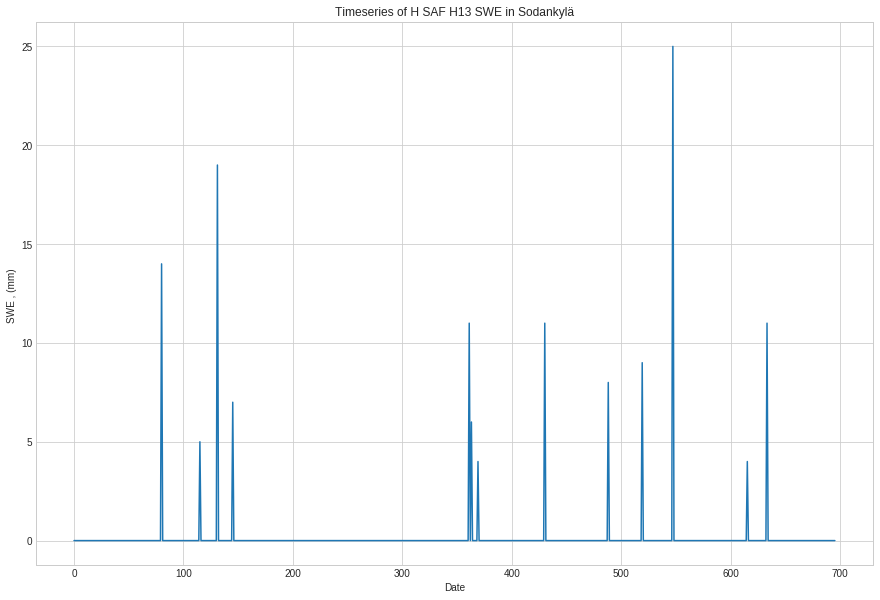

In [101]:
files = glob.glob1('./h13_test_data','*.'+'tif' ) 
center = (37,37)

m = Map(center=center, zoom=5)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)


marker.location = (37, 37)

def on_location_changed(event):
    lat=np.arange(25-0.125,75+0.125,0.25)
    lon=np.arange(-25-0.125,45+0.125,0.25)

    #FMI Sodankylä site coordinates
    sod={}
    sod['lat']=marker.location[0]
    sod['lon']=marker.location[1]
    
#     sod['lat']=67.41667
#     sod['lon']=26.6

    #convert to pixel coordinates
    lat_val=lat.flat[np.abs(lat-sod['lat']).argmin()]
    lon_val=lon.flat[np.abs(lon-sod['lon']).argmin()]

    sod['x']=np.where(lon==lon_val)
    sod['y']=np.where(lat==lat_val)

    swe_data=[]

    for file in files:
        raster = gdal.Open(os.path.join(process_path,file),  gdal.GA_ReadOnly)
        data = raster.GetRasterBand(1).ReadAsArray()
        data = data[::-1]
        dvalue=data[sod['y'],sod['x']]
        swe_data.append(dvalue[0])

    xdata=np.arange(len(swe_data))
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title('Timeseries of H SAF H13 SWE in Sodankylä')
    ax.set_xlabel('Date')
    ax.set_ylabel('SWE (mm) ')
    fig=plt.plot(xdata,swe_data)
    plt.show()

marker.observe(on_location_changed, 'location')